In [31]:
#Imports

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pprint
import json
import requests
from APIKeyKu import api_key

API DATA

In [ ]:
url = "https://api-formula-1.p.rapidapi.com/rankings/races"

querystring = {"race":"71"}
headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}


Call of data from API

In [ ]:
response = requests.get(url, headers=headers, params=querystring)
response_json = response.json()
print(response.json())
print(json.dumps(response.json(), indent=4, sort_keys=True))
data = response.json()['response']


{'get': 'rankings', 'parameters': {'race': '71'}, 'errors': [], 'results': 22, 'response': [{'race': {'id': 71}, 'driver': {'id': 1, 'name': 'Nico Rosberg', 'abbr': 'ROS', 'number': 6, 'image': 'https://media-4.api-sports.io/formula-1/drivers/1.png'}, 'team': {'id': 5, 'name': 'Mercedes-AMG Petronas', 'logo': 'https://media-4.api-sports.io/formula-1/teams/5.png'}, 'position': 1, 'time': '1:33:34.696', 'laps': 57, 'grid': '2', 'pits': 3, 'gap': None}, {'race': {'id': 71}, 'driver': {'id': 7, 'name': 'Kimi Raikkonen', 'abbr': 'RAI', 'number': 7, 'image': 'https://media-4.api-sports.io/formula-1/drivers/7.png'}, 'team': {'id': 3, 'name': 'Scuderia Ferrari', 'logo': 'https://media-4.api-sports.io/formula-1/teams/3.png'}, 'position': 2, 'time': '+10.282', 'laps': 57, 'grid': '4', 'pits': 3, 'gap': None}, {'race': {'id': 71}, 'driver': {'id': 20, 'name': 'Lewis Hamilton', 'abbr': 'HAM', 'number': 44, 'image': 'https://media-4.api-sports.io/formula-1/drivers/20.png'}, 'team': {'id': 5, 'name'

CREATING DATAFRAME FOR INITIAL DATA

In [ ]:
driver = []
driver_id = []
position_finished = []
for ind in range(len(data)):
    driver.append(data[ind]['driver']['name'])
    driver_id.append(data[ind]['driver']['id'])
    position_finished.append(data[ind]['position'])
driver_info = {"Driver": driver,
               "Driver_ID": driver_id,
               "Position_Finished": position_finished}
driver_rank_df = pd.DataFrame(driver_info)
driver_rank_df


,Driver,Driver_ID,Position_Finished
0,Nico Rosberg,1,1
1,Kimi Raikkonen,7,2
2,Lewis Hamilton,20,3
3,Daniel Ricciardo,14,4
4,Romain Grosjean,16,5
5,Max Verstappen,25,6
6,Daniil Kvyat,9,7
7,Felipe Massa,22,8
8,Valtteri Bottas,5,9
9,Stoffel Vandoorne,30,10


IMPORT FROM API THE STARTING GRID INFORMATION API

In [ ]:
import requests

url1 = "https://api-formula-1.p.rapidapi.com/rankings/startinggrid"
querystring = {"race":"71"}

headers1 = {
	"X-RapidAPI-Key": "27fb5893edmsh7505763582a4ad2p13a353jsn0beb89136270",
	"X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}

In [ ]:
response_sg = requests.get(url1, headers=headers1, params=querystring)
print(response_sg.json())
print(json.dumps(response_sg.json(), indent=4, sort_keys=True))
sg_data = response_sg.json()['response']

{'get': 'rankings', 'parameters': {'race': '71'}, 'errors': [], 'results': 21, 'response': [{'race': {'id': 71}, 'driver': {'id': 20, 'name': 'Lewis Hamilton', 'abbr': 'HAM', 'number': 44, 'image': 'https://media-4.api-sports.io/formula-1/drivers/20.png'}, 'team': {'id': 5, 'name': 'Mercedes-AMG Petronas', 'logo': 'https://media-4.api-sports.io/formula-1/teams/5.png'}, 'position': 1, 'time': '1:29.493'}, {'race': {'id': 71}, 'driver': {'id': 1, 'name': 'Nico Rosberg', 'abbr': 'ROS', 'number': 6, 'image': 'https://media-4.api-sports.io/formula-1/drivers/1.png'}, 'team': {'id': 5, 'name': 'Mercedes-AMG Petronas', 'logo': 'https://media-4.api-sports.io/formula-1/teams/5.png'}, 'position': 2, 'time': '1:29.570'}, {'race': {'id': 71}, 'driver': {'id': 19, 'name': 'Sebastian Vettel', 'abbr': 'VET', 'number': 5, 'image': 'https://media-4.api-sports.io/formula-1/drivers/19.png'}, 'team': {'id': 3, 'name': 'Scuderia Ferrari', 'logo': 'https://media-4.api-sports.io/formula-1/teams/3.png'}, 'posi

In [ ]:
driver = []
starting_position = []
for ind in range(len(sg_data)):
    starting_position.append(sg_data[ind]['position'])
    driver.append(sg_data[ind]['driver']['name'])
driver_position_info = {"Driver": driver,
               "Starting_Position": starting_position}
driver_start_df = pd.DataFrame(driver_position_info)
print (driver_start_df)


               Driver  Starting_Position
0      Lewis Hamilton                  1
1        Nico Rosberg                  2
2    Sebastian Vettel                  3
3      Kimi Raikkonen                  4
4    Daniel Ricciardo                  5
5     Valtteri Bottas                  6
6        Felipe Massa                  7
7     Nico Hulkenberg                  8
8     Romain Grosjean                  9
9      Max Verstappen                 10
10    Carlos Sainz Jr                 11
11  Stoffel Vandoorne                 12
12  Esteban Gutierrez                 13
13      Jenson Button                 14
14       Daniil Kvyat                 15
15    Pascal Wehrlein                 16
16    Marcus Ericsson                 17
17       Sergio Perez                 18
18      Jolyon Palmer                 19
19       Rio Haryanto                 20
20        Felipe Nasr                 21


IMPORTING PITSTOP DATA FROM PITSTOP API

In [ ]:
import requests

url2 = "https://api-formula-1.p.rapidapi.com/pitstops"

querystring = {"race":"71"}

headers = {
	"X-RapidAPI-Key": "27fb5893edmsh7505763582a4ad2p13a353jsn0beb89136270",
	"X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}

In [ ]:
response_ps = requests.get(url2, headers=headers, params=querystring)
print(response_ps.json())
print(json.dumps(response_ps.json(), indent=4, sort_keys=True))
ps_data = response_ps.json()['response']

{'get': 'pitstops', 'parameters': {'race': '71'}, 'errors': [], 'results': 53, 'response': [{'race': {'id': 71}, 'driver': {'id': 6, 'name': 'Nico Hulkenberg', 'abbr': 'HUL', 'number': 27, 'image': 'https://media-4.api-sports.io/formula-1/drivers/6.png'}, 'team': {'id': 4, 'name': 'Force India', 'logo': 'https://media-4.api-sports.io/formula-1/teams/4.png'}, 'stops': 1, 'lap': 1, 'time': '31.931', 'total_time': '31.931'}, {'race': {'id': 71}, 'driver': {'id': 10, 'name': 'Sergio Perez', 'abbr': 'PER', 'number': 11, 'image': 'https://media-4.api-sports.io/formula-1/drivers/10.png'}, 'team': {'id': 4, 'name': 'Force India', 'logo': 'https://media-4.api-sports.io/formula-1/teams/4.png'}, 'stops': 1, 'lap': 2, 'time': '30.326', 'total_time': '30.326'}, {'race': {'id': 71}, 'driver': {'id': 24, 'name': 'Carlos Sainz Jr', 'abbr': 'SAI', 'number': 55, 'image': 'https://media-4.api-sports.io/formula-1/drivers/24.png'}, 'team': {'id': 7, 'name': 'Scuderia AlphaTauri Honda', 'logo': 'https://med

CREATING DATA FRAME TO STORE DATA

In [ ]:
driver = []
pit_stops = []
pit_time = []
for ind in range(len(ps_data)):
    pit_stops.append(ps_data[ind]['stops'])
    pit_time.append(ps_data[ind]['total_time'])
    driver.append(ps_data[ind]['driver']['name'])
driver_pit_info = {"Driver": driver,
               "Pit_Stops": pit_stops,
               "Total_Pit_Time": pit_time}
driver_pitstop_df = pd.DataFrame(driver_pit_info)
print (driver_pitstop_df)

               Driver  Pit_Stops Total_Pit_Time
0     Nico Hulkenberg          1         31.931
1        Sergio Perez          1         30.326
2     Carlos Sainz Jr          1         28.401
3    Daniel Ricciardo          1         24.541
4        Felipe Massa          1         24.093
5     Valtteri Bottas          1         24.944
6   Esteban Gutierrez          1         32.793
7   Stoffel Vandoorne          1         24.604
8     Valtteri Bottas          2         44.313
9      Max Verstappen          1         25.810
10        Felipe Nasr          1         26.246
11    Romain Grosjean          1         25.739
12    Pascal Wehrlein          1         26.236
13     Kimi Raikkonen          1         24.720
14    Kevin Magnussen          1         26.876
15       Rio Haryanto          1         26.382
16       Nico Rosberg          1         24.934
17     Lewis Hamilton          1         24.512
18    Marcus Ericsson          1         24.775
19       Sergio Perez          2        

MERGING ALL DATA INTO ONE DATAFRAME

In [ ]:
race_df = pd.merge(driver_rank_df, driver_start_df, how="left")
race_data_df = pd.merge(race_df, driver_pitstop_df, how="left")
race_data_df

,Driver,Driver_ID,Position_Finished,Starting_Position,Pit_Stops,Total_Pit_Time
0,Nico Rosberg,1,1,2.0,1.0,24.934
1,Nico Rosberg,1,1,2.0,2.0,52.160
2,Nico Rosberg,1,1,2.0,3.0,1:17.921
3,Kimi Raikkonen,7,2,4.0,1.0,24.720
4,Kimi Raikkonen,7,2,4.0,2.0,49.942
5,Kimi Raikkonen,7,2,4.0,3.0,1:15.199
6,Lewis Hamilton,20,3,1.0,1.0,24.512
7,Lewis Hamilton,20,3,1.0,2.0,49.542
8,Lewis Hamilton,20,3,1.0,3.0,1:14.066
9,Daniel Ricciardo,14,4,5.0,1.0,24.541


SCRUBBING THE DATA

In [ ]:
rows_to_remove = [0,1,3,4,6,7,9,10,12,13,15,16,18,19,21,22,23,24,26,27,29,30,32,33,34,35,37,38,40,41,42,44,45,47,48,50,51,52,53,54,55]
race_data_df = race_data_df.drop(rows_to_remove)
race_data_df.fillna(13,inplace=True)
race_data_df

,Driver,Driver_ID,Position_Finished,Starting_Position,Pit_Stops,Total_Pit_Time
2,Nico Rosberg,1,1,2.0,3.0,1:17.921
5,Kimi Raikkonen,7,2,4.0,3.0,1:15.199
8,Lewis Hamilton,20,3,1.0,3.0,1:14.066
11,Daniel Ricciardo,14,4,5.0,3.0,1:16.051
14,Romain Grosjean,16,5,9.0,3.0,1:21.953
17,Max Verstappen,25,6,10.0,3.0,1:16.533
20,Daniil Kvyat,9,7,15.0,3.0,1:13.304
25,Valtteri Bottas,5,9,6.0,3.0,1:10.423
28,Stoffel Vandoorne,30,10,12.0,3.0,1:14.602
31,Kevin Magnussen,2,11,13.0,3.0,1:15.600


CREATING THE FIRST SCATTERPLOT OF STARTING POSITION VS POSITION FINISHED

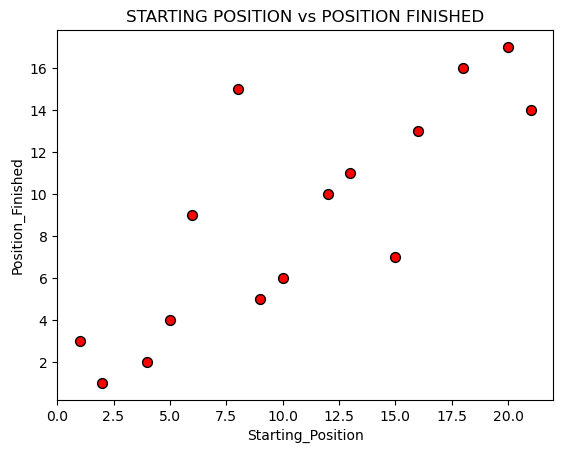

In [ ]:
race_data_df.plot.scatter(x ='Starting_Position', y ='Position_Finished',marker="o", color="red", edgecolors="black", s=50)
plt.title('STARTING POSITION vs POSITION FINISHED')
plt.show()

DECLARING VARIABLE X AND Y

In [ ]:
x = race_data_df["Starting_Position"].values
y = race_data_df["Position_Finished"].values

PLOTTING A TRENDLINE FOR THE STARTING POSITION VS POSTION FINISHED
PLOT SHOWS THERE'S A STRONG CORRELATION BETWEEN STARTING POSITION AND WHERE YOU FINISH THE RACE

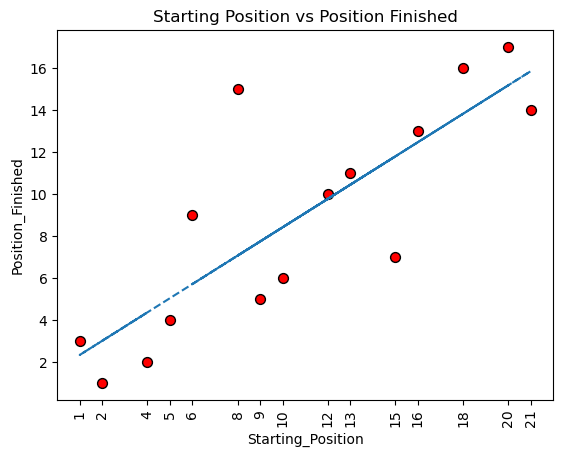

In [ ]:
from scipy import stats
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(x, y)
d_fit = d_slope * x + d_int
#plt.scatter(x, y)
race_data_df.plot.scatter(x ='Starting_Position', y ='Position_Finished',marker="o", color="red", edgecolors="black", s=50)
plt.plot(x,d_fit,"--")
plt.title('Starting Position vs Position Finished')
plt.xticks(x, rotation=90)

plt.show()

In [ ]:
race_data_df['Positions_Gained/Lost'] = race_data_df['Starting_Position'] - race_data_df['Position_Finished']
race_data_df

,Driver,Driver_ID,Position_Finished,Starting_Position,Pit_Stops,Total_Pit_Time,Positions_Gained/Lost
2,Nico Rosberg,1,1,2.0,3.0,1:17.921,1.0
5,Kimi Raikkonen,7,2,4.0,3.0,1:15.199,2.0
8,Lewis Hamilton,20,3,1.0,3.0,1:14.066,-2.0
11,Daniel Ricciardo,14,4,5.0,3.0,1:16.051,1.0
14,Romain Grosjean,16,5,9.0,3.0,1:21.953,4.0
17,Max Verstappen,25,6,10.0,3.0,1:16.533,4.0
20,Daniil Kvyat,9,7,15.0,3.0,1:13.304,8.0
25,Valtteri Bottas,5,9,6.0,3.0,1:10.423,-3.0
28,Stoffel Vandoorne,30,10,12.0,3.0,1:14.602,2.0
31,Kevin Magnussen,2,11,13.0,3.0,1:15.600,2.0


SORTING THE DATA BY TOTAL PIT TIMES

In [ ]:
sorted_pit = race_data_df.sort_values(by='Total_Pit_Time')
sorted_pit

,Driver,Driver_ID,Position_Finished,Starting_Position,Pit_Stops,Total_Pit_Time,Positions_Gained/Lost
25,Valtteri Bottas,5,9,6.0,3.0,1:10.423,-3.0
20,Daniil Kvyat,9,7,15.0,3.0,1:13.304,8.0
8,Lewis Hamilton,20,3,1.0,3.0,1:14.066,-2.0
28,Stoffel Vandoorne,30,10,12.0,3.0,1:14.602,2.0
5,Kimi Raikkonen,7,2,4.0,3.0,1:15.199,2.0
31,Kevin Magnussen,2,11,13.0,3.0,1:15.600,2.0
11,Daniel Ricciardo,14,4,5.0,3.0,1:16.051,1.0
17,Max Verstappen,25,6,10.0,3.0,1:16.533,4.0
36,Pascal Wehrlein,33,13,16.0,3.0,1:17.202,3.0
39,Felipe Nasr,23,14,21.0,3.0,1:17.397,7.0


CREATING A SCATTER PLOT OF POSITON FINISHED VS TOTAL PIT TIME
THE PLOT SHOWS THAT THE CORRELATION BETWEEN PIT STOPS AND THE TIMES SPENT IN THE PIT IS NOT AS STRONGLY CORRELATED.

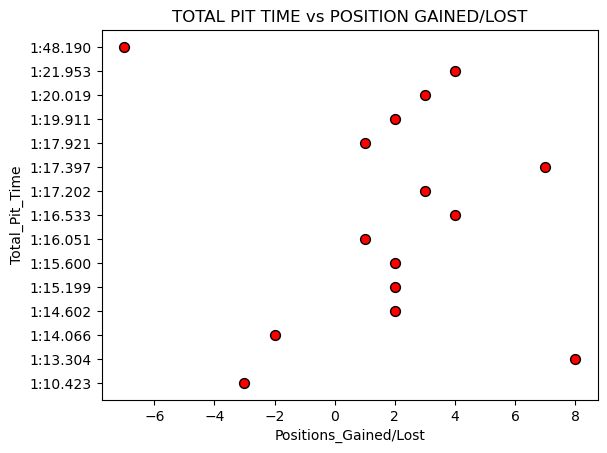

In [ ]:
sorted_pit.plot.scatter(x ='Positions_Gained/Lost', y ='Total_Pit_Time',marker="o", color="red", edgecolors="black", s=50)
plt.title('TOTAL PIT TIME vs POSITION GAINED/LOST')
plt.show()

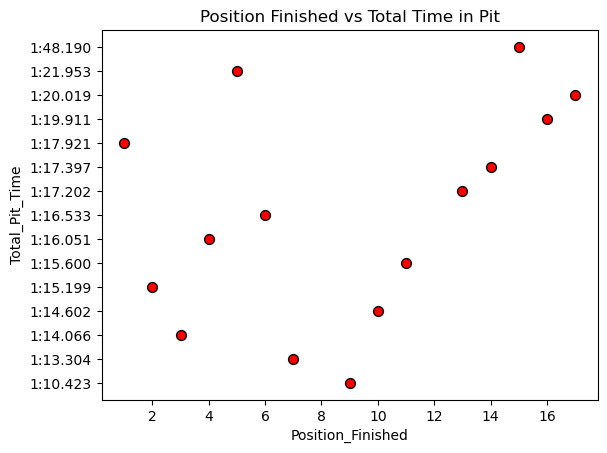

In [ ]:
sorted_pit.plot.scatter(x ='Position_Finished', y ='Total_Pit_Time',marker="o", color="red", edgecolors="black", s=50)
plt.title('Position Finished vs Total Time in Pit')
plt.show()